# Linear Regression Part - 1

In [5]:
using DataFrames

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1260


In [7]:
dataset = DataFrame(Promote = [23, 56, 34, 25, 67, 82, 46, 14, 6, 47, 52, 88, 71, 78, 66, 44, 68, 90, 22], 
    Sales = [554, 1339, 815, 609, 1600, 2000, 1000, 300, 150, 1150, 1200, 2000, 1750, 2000, 1500, 1000, 1600, 2000, 550])

,Promote,Sales
,Int64,Int64
1,23,554
2,56,1339
3,34,815
4,25,609
5,67,1600
6,82,2000
7,46,1000
8,14,300
9,6,150


In [14]:
X = dataset[:Promote]
Y = dataset[:Sales];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:2
└ @ Core In[14]:2


In [10]:
#Pkg.add("Plots")
using Plots;

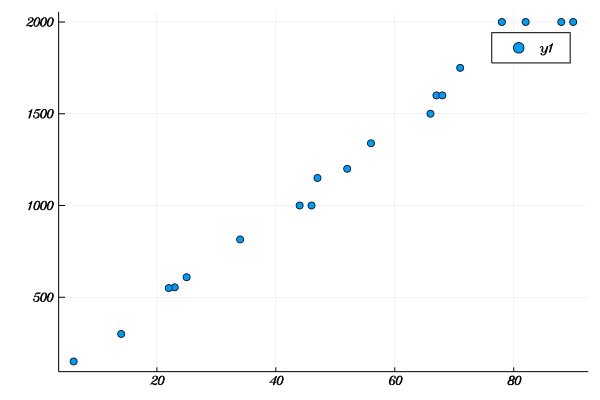

In [11]:
scatter(dataset.Promote, dataset.Sales)

In [ ]:
#=
y = mx + c

Sales = m * promote + c

Sales = Slope * promote + Intercept
=#

# Linear Regression Part - 2

## Method 1

$$y=c+mx$$

$$m = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})}^2} $$

$$c= \bar{y}-m\bar{x} $$

In [12]:
using Statistics

In [15]:
m = sum((X .- mean(X)) .* (Y .- mean(Y))) / sum((X .- mean(X)) .* (X .- mean(X)))
c = mean(Y) - m .* mean(X);

In [16]:
m, c

(23.50640302155077, 5.485865363252515)

In [ ]:
Sales = 23.5 * promote + 5.48

In [17]:
23.5 * 50 + 5.48

1180.48

## Method 2

In [19]:
Pkg.add("GLM")
using GLM

   Updating registry at `C:\Users\andre\.juliapro\JuliaPro_v1.4.0-1\registries\JuliaPro`
  Resolving package versions...
  Installed Rmath ──────────────────────── v0.6.1
  Installed QuadGK ─────────────────────── v2.3.1
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed Arpack_jll ─────────────────── v3.5.0+3
  Installed Arpack ─────────────────────── v0.4.0
  Installed StatsFuns ──────────────────── v0.9.5
  Installed GLM ────────────────────────── v1.3.9
  Installed Distributions ──────────────── v0.23.4
  Installed Rmath_jll ──────────────────── v0.2.2+1
  Installed PDMats ─────────────────────── v0.9.12
  Installed OpenSpecFun_jll ────────────── v0.5.3+3
  Installed OpenBLAS_jll ───────────────── v0.3.9+4
  Installed ShiftedArrays ──────────────── v1.0.0
  Installed StatsModels ────────────────── v0.6.11
  Installed SpecialFunctions ───────────── v0.10.3
  Installed FillArrays ─────────────────── v0.8.11
   Updating `C:\Users\andre\.juliapro\JuliaPro_v1.4.0-1\environm

In [20]:
names(dataset)

2-element Array{Symbol,1}:
 :Promote
 :Sales

In [21]:
ols = lm(@formula(Sales ~ Promote), dataset)  # ordinary linear square

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Sales ~ 1 + Promote

Coefficients:
────────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   5.48587   34.718      0.158012    0.8763   -67.7627    78.7344
Promote      23.5064     0.606353  38.7668      <1e-17    22.2271    24.7857
────────────────────────────────────────────────────────────────────────────

In [22]:
using DataFrames

In [23]:
predict(ols, DataFrame(Promote = [50]))

1-element Array{Union{Missing, Float64},1}:
 1180.806016440791

# Multiple Linear Regression

In [24]:
using CSV

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


In [25]:
s2 = CSV.read("salary.csv")

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department
,Int64,Int64,Int64,Int64,String,String
1,32782,1,0,7,Male,A
2,32920,3,15,9,Female,A
3,29548,6,5,1,Male,A
4,39828,6,18,5,Female,A
5,31528,11,3,3,Male,A
6,38985,7,18,9,Male,A
7,41889,16,22,7,Male,A
8,38791,4,21,5,Male,A
9,28985,1,0,4,Female,A


In [26]:
names(s2)

7-element Array{Symbol,1}:
 :Salary
 :Years_Previous_Experience
 :Years_Employed
 :Years_Education
 :Gender
 :Department
 :Number_Supervised

In [28]:
ols2 = lm(@formula(Salary ~ Years_Previous_Experience + Years_Employed + Years_Education + Gender), s2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + Years_Previous_Experience + Years_Employed + Years_Education + Gender

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                            Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                23167.1      2072.0    11.181       <1e-13   18982.6   27351.6
Years_Previous_Experience   -114.747     239.075  -0.479963    0.6338    -597.57    368.075
Years_Employed               656.497     144.942   4.52937     <1e-4      363.78    949.214
Years_Education             1903.99      386.932   4.92072     <1e-4     1122.56   2685.41
Gender: Male                1468.1      1804.27    0.813682    0.4205   -2175.69   5111.9
─

In [29]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education = [12], Gender = ["Male"]))

1-element Array{Union{Missing, Float64},1}:
 51504.78590840764

In [30]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education = [12], Gender = ["Female"]))

1-element Array{Union{Missing, Float64},1}:
 50036.68417086605

In [31]:
predict(ols2, DataFrame(Years_Previous_Experience = [5,4], Years_Employed = [7,9], Years_Education = [12,15], 
        Gender = ["Male","Female"]))

2-element Array{Union{Missing, Float64},1}:
 51504.78590840764
 57176.38183377373